In [1983]:
import pandas as pd
import pdfplumber
import numpy as np
from utils import *

## Table detection


In [1984]:
# pdf_restric

In [1985]:
# pdf_path = "mcs2024.pdf"

# material = 'Sand and Gravel'

# p = 159


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_1'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [1986]:
# pdf_path = "mcs2024.pdf"

# material = 'ABRASIVES'

# p = 34


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_2'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [1987]:
# pdf_path = "mcs2024.pdf"

# material = 'SILICON'

# p = 164


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_2'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [1988]:
pdf_path = "mcs2024.pdf"

material = 'Fluorspar'

p = 76


pdf_restric = {material: [p, p+1]}

selected_p = p

scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

selected_content = 'content_2'

if selected_content == 'content_1':
    selected_p = p - 1
else:
    selected_p = p

selected_page = scraping_base[material][selected_content]
df = selected_page
page_text_df = selected_page


bounding_box = extract_cols(page_text_df, 'x1', 2)

In [1989]:
# pdf_path = "mcs2024.pdf"

# material = 'Selenium'

# p = 162


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_2'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [1990]:
# Compute margin_top
# refering to previous word (in reading order)
df['margin_top'] = df['bottom'] - df['top'].shift(1)

# Fill the last value of margin_top with 0 or NaN as it has no preceding word
df['margin_top'] = df['margin_top'].fillna(0)

# set margin_top to 0 words in same line
df['margin_top'] = df.apply(lambda row: 0 if row['top'] == df['top'].shift(
    1).loc[row.name] else row['margin_top'], axis=1)

gap_y_df = df[df['margin_top'] > 27]
# Perspective : change threshold using statistic (example : quantile 75 of margin_top)

In [1991]:
# bounding_box['max_top_class'] = bounding_box['max_top'].apply(convert_to_class).astype(int)

# # Count occurrences of each value in 'max_top_class'
# class_counts = bounding_box['max_top_class'].value_counts()

# # Filter the dataframe to remove rows where 'max_top_class' exists only once
# bounding_box = bounding_box[bounding_box['max_top_class'].isin(class_counts[class_counts > 1].index)]

In [1992]:
# bounding_box['min_bottom_class'] = bounding_box['min_bottom'].apply(convert_to_class).astype(int)

# # Count occurrences of each value in 'max_top_class'
# class_counts = bounding_box['min_bottom_class'].value_counts()

# # Filter the dataframe to remove rows where 'max_top_class' exists only once
# bounding_box = bounding_box[bounding_box['min_bottom_class'].isin(class_counts[class_counts > 1].index)]

In [1993]:
bounding_box

,x1,min_bottom,max_top
0,319.94,499.197,357.74496
1,374.05,477.117,401.15700
2,374.06,499.197,379.19700
3,516.85,499.197,412.19700
4,516.86,477.117,379.19700


In [1994]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming bounding_box is already defined as a DataFrame

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

combined_data = np.concatenate(
    (bounding_box[['min_bottom']], bounding_box[['max_top']]), axis=0)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the combined data
normalized_combined_data = scaler.fit_transform(combined_data)

# Split the combined data back into two columns
split_index = len(bounding_box)
normalized_min_bottom = normalized_combined_data[:split_index]
normalized_max_top = normalized_combined_data[split_index:]

# Assign the scaled values back to the DataFrame
bounding_box['min_bottom_normalized'] = np.round(normalized_min_bottom, 0)
bounding_box['max_top_normalized'] = np.round(normalized_max_top, 0)

In [1995]:
bounding_box

,x1,min_bottom,max_top,min_bottom_normalized,max_top_normalized
0,319.94,499.197,357.74496,1.0,0.0
1,374.05,477.117,401.15700,1.0,0.0
2,374.06,499.197,379.19700,1.0,0.0
3,516.85,499.197,412.19700,1.0,0.0
4,516.86,477.117,379.19700,1.0,0.0


In [1996]:
# Group by 'min_bottom_normalized' and 'max_top_normalized'
grouped = bounding_box.groupby(['min_bottom_normalized'])

# Convert each group into a separate dataframe and store them in a list
list_of_dfs = [group.reset_index(drop=True) for _, group in grouped]

list_of_top_bottom_bbox = []
for _, group in grouped:
    if len(group) > 1:
        list_of_top_bottom_bbox.append({
            'bbox_top': float(group['max_top'].min()),
            'bbox_bottom': float(group['min_bottom'].max())
        })

In [1997]:
list_of_top_bottom_bbox

[{'bbox_top': 357.74496, 'bbox_bottom': 499.197}]

In [1998]:
list_of_bbox = []
list_of_table_df = []
for top_bottom_bbox in list_of_top_bottom_bbox:
    bbox_top, bbox_bottom = top_bottom_bbox['bbox_top'], top_bottom_bbox['bbox_bottom']

    # Find the nearest 'top' and 'bottom' values in the dataframe
    gap_y_df['top_diff'] = np.abs(gap_y_df['top'] - bbox_top)
    gap_y_df['bottom_diff'] = np.abs(gap_y_df['bottom'] - bbox_bottom)
    gap_y_df['total_diff'] = gap_y_df['top_diff'] + gap_y_df['bottom_diff']

    # Get the row with the minimum total difference
    nearest_row = gap_y_df.loc[gap_y_df['total_diff'].idxmin()]
    nearest_row['top']

    # Calculate the differences between bbox_top and the 'top' values in the dataframe
    gap_y_df['top_diff'] = np.abs(gap_y_df['top'] - bbox_top)

    # Find the row with the minimum 'top_diff' and maximum 'bottom_diff'
    nearest_top_row = gap_y_df.loc[gap_y_df['top_diff'].idxmin()]

    # Filter the dataframe to only include rows with the nearest 'top' and 'bottom' values
    nearest_top_df = gap_y_df[gap_y_df['top'] == nearest_top_row['top']]
    bbox_top_final, bbox_bottom_final = nearest_top_df['top'], bbox_bottom

    padding = 5

    bbox_top_final, bbox_bottom_final = float(
        nearest_top_df['top']), float(bbox_bottom)

    table_df = page_text_df[(page_text_df['top'] >= bbox_top_final - padding)
                            & (page_text_df['bottom'] <= bbox_bottom_final + padding)]

    bbox_start, bbox_end = float(
        table_df['x0'].min()), float(table_df['x1'].max())

    list_of_bbox.append({
        'bbox_top': bbox_top_final,
        'bbox_bottom': bbox_bottom_final,
        'bbox_start': bbox_start,
        'bbox_end': bbox_end
    })
    list_of_table_df.append(table_df)

C:\Users\DataScience\AppData\Local\Temp\ipykernel_25156\1143877381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_y_df['top_diff'] = np.abs(gap_y_df['top'] - bbox_top)
C:\Users\DataScience\AppData\Local\Temp\ipykernel_25156\1143877381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_y_df['bottom_diff'] = np.abs(gap_y_df['bottom'] - bbox_bottom)
C:\Users\DataScience\AppData\Local\Temp\ipykernel_25156\1143877381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [1999]:
list_of_table_df[0]

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top
310,Mine,296.280000,318.977844,346.70496,58197.03852,356.66496,True,9.96000,22.697844,ltr,32.54796
311,production,321.718836,373.881348,346.70496,58197.03852,356.66496,True,9.96000,52.162512,ltr,0.00000
312,Reserves4,468.840000,516.842880,345.39648,58195.73004,356.66496,True,11.26848,48.002880,ltr,9.96000
313,2022,297.840000,319.937760,357.74496,58208.07852,367.70496,True,9.96000,22.097760,ltr,22.30848
314,2023e,348.240000,374.042880,356.43648,58206.77004,367.70496,True,11.26848,25.802880,ltr,9.96000
315,United,44.880000,73.693284,368.15700,58218.49056,378.11700,True,9.96000,28.813284,ltr,21.68052
316,States,76.551804,104.808324,368.15700,58218.49056,378.11700,True,9.96000,28.256520,ltr,0.00000
317,NA,306.120000,319.964400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000
318,NA,360.240000,374.084400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000
319,NA,503.040000,516.884400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000


In [2000]:
list_of_bbox[0]

{'bbox_top': 346.70496,
 'bbox_bottom': 499.197,
 'bbox_start': 44.88,
 'bbox_end': 516.8844}

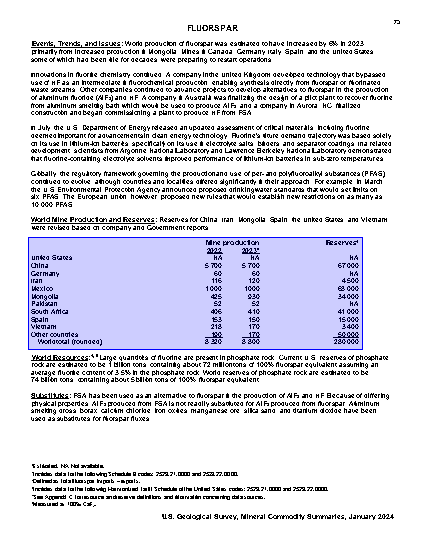

In [2001]:
with pdfplumber.open("mcs2024.pdf") as pdf:
    im = pdf.pages[selected_p].to_image(resolution=50)

# Draw a rectangle using the bounding box coordinates
border_color = "blue"

for bbox in list_of_bbox:
    # Draw a rectangle using the bounding box coordinates with specified colors
    im.draw_rect([bbox['bbox_start'] - padding, bbox['bbox_top'] - padding, bbox['bbox_end'] + padding, bbox['bbox_bottom'] + padding],
                 stroke=border_color, stroke_width=1)

im

In [2002]:
# STOP HERE

## Table to Dataframe


In [2003]:
import re

# Remove special characters from 'text'
table_df['text'] = table_df['text'].apply(lambda x: re.sub(r'\W+', '', x))

C:\Users\DataScience\AppData\Local\Temp\ipykernel_25156\1481100593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df['text'] = table_df['text'].apply(lambda x: re.sub(r'\W+', '', x))


In [2004]:
# table_df

In [2005]:
# filter indices (smaller than most used text height)

mode_height = table_df['height'].mode()[0]

table_df = table_df[table_df['height'] >= round(mode_height, 0)]

In [2006]:
# table_df

In [2007]:
mode_height

9.960000000000036

In [2008]:
for i in range(len(list_of_table_df)):
    table_df = list_of_table_df[i]
    mode_height = table_df['height'].mode()[0]
    list_of_table_df[i] = table_df[table_df['height'] >= round(mode_height - 3, 0)]

In [2009]:
list_table_and_bbox = list(zip(list_of_table_df, list_of_bbox))

In [2010]:
list_of_table_df

[           text          x0          x1        top       doctop     bottom  \
 310        Mine  296.280000  318.977844  346.70496  58197.03852  356.66496   
 311  production  321.718836  373.881348  346.70496  58197.03852  356.66496   
 312   Reserves4  468.840000  516.842880  345.39648  58195.73004  356.66496   
 313        2022  297.840000  319.937760  357.74496  58208.07852  367.70496   
 314       2023e  348.240000  374.042880  356.43648  58206.77004  367.70496   
 315      United   44.880000   73.693284  368.15700  58218.49056  378.11700   
 316      States   76.551804  104.808324  368.15700  58218.49056  378.11700   
 317          NA  306.120000  319.964400  368.15700  58218.49056  378.11700   
 318          NA  360.240000  374.084400  368.15700  58218.49056  378.11700   
 319          NA  503.040000  516.884400  368.15700  58218.49056  378.11700   
 320       China   44.880000   70.939344  379.19700  58229.53056  389.15700   
 321        5700  294.960000  319.935120  379.19700 

In [2011]:
# list_of_table_df[0]

In [2012]:
table_df[table_df['text'] == 'countries10']

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top


In [2013]:
table_df[table_df['text'] == '957']

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top


In [2014]:
list_of_bbox[0]

{'bbox_top': 346.70496,
 'bbox_bottom': 499.197,
 'bbox_start': 44.88,
 'bbox_end': 516.8844}

In [2015]:
def spot_indice (list_table_and_bbox):

  indice_bbox_table = []
  for table_df, bbox in list_table_and_bbox:
    with pdfplumber.open(pdf_path) as pdf:
      
      page_ch = pdf.pages[selected_p]
      chars = page_ch.chars
      
      # Filter words that fall within the specified coordinates
      chars_in_area = [
          char for char in chars 
          if  bbox['bbox_top'] - 1.3 <= char['top'] and bbox['bbox_bottom'] >= char['bottom']
      ]

      list_of_indices = []
      for char in chars_in_area:
        if char['height'] < table_df['height'].mode()[0]:
          char_left = {key: char[key] for key in ['text', 'x0', 'x1', 'bottom', 'top', 'height', 'width']}
          list_of_indices.append(char_left)

      indice_bbox_table.append({
                'table_df': table_df,
                'bbox': bbox,
                'indices': list_of_indices
            })
  
  return indice_bbox_table

In [2016]:
# check = spot_indice (list_table_and_bbox)[1]

In [2017]:
# check[20]['text']

In [2018]:
indice_bbox_table = spot_indice(list_table_and_bbox)

In [2019]:
# indice_bbox_table

In [2020]:
i = 0

len(indice_bbox_table[i]['indices'])

36

In [2021]:
indice_bbox_table[i]['indices']

[{'text': ' ',
  'x0': 278.4,
  'x1': 281.16888,
  'bottom': 358.82496,
  'top': 348.86496,
  'height': 9.95999999999998,
  'width': 2.768880000000024},
 {'text': 'M',
  'x0': 296.28,
  'x1': 304.57667999999995,
  'bottom': 356.66496,
  'top': 346.70496,
  'height': 9.95999999999998,
  'width': 8.29667999999998},
 {'text': 'i',
  'x0': 304.55974799999996,
  'x1': 307.328628,
  'bottom': 356.66496,
  'top': 346.70496,
  'height': 9.95999999999998,
  'width': 2.768880000000024},
 {'text': 'n',
  'x0': 307.319664,
  'x1': 313.405224,
  'bottom': 356.66496,
  'top': 346.70496,
  'height': 9.95999999999998,
  'width': 6.085559999999987},
 {'text': 'e',
  'x0': 313.44008399999996,
  'x1': 318.97784399999995,
  'bottom': 356.66496,
  'top': 346.70496,
  'height': 9.95999999999998,
  'width': 5.537759999999992},
 {'text': ' ',
  'x0': 318.95991599999996,
  'x1': 321.728796,
  'bottom': 356.66496,
  'top': 346.70496,
  'height': 9.95999999999998,
  'width': 2.768880000000024},
 {'text': 'p',
  

In [2022]:
def update_words_coordinates(indice_bbox_table):
    for entry in indice_bbox_table:
        words_df = entry['table_df']
        bbox = entry['bbox']
        chars_in_area = entry['indices']
        
        # Iterate over each character in the chars_in_area
        for char in chars_in_area:
            char_x0, char_top, char_x1, char_bottom = char['x0'], char['top'], char['x1'], char['bottom']

            # Find the word that contains this character
            for idx, word_row in words_df.iterrows():
                word_x0, word_top, word_x1, word_bottom = word_row['x0'], word_row['top'], word_row['x1'], word_row['bottom']
                
                if (word_x0 <= char_x0 <= word_x1 and word_top <= char_top <= word_bottom):
                    word_text = word_row['text']
                    char_text = char['text']
                    
                    # Check if the character is on the left or right boundary of the word
                    if char_x0 <= word_x0:  # Character is to the left
                        # Remove the first occurrence of the character
                        word_text = word_text.replace(char_text, '', 1)
                        # Update the word text and coordinates
                        words_df.at[idx, 'text'] = word_text
                        words_df.at[idx, 'x0'] = char_x1
                    elif char_x1 >= word_x1:  # Character is to the right
                        # Remove the last occurrence of the character
                        word_text = word_text[::-1].replace(char_text[::-1], '', 1)[::-1]
                        # Update the word text and coordinates
                        words_df.at[idx, 'text'] = word_text
                        words_df.at[idx, 'x1'] = char_x0
                    
                    # Update the width of the word
                    words_df.at[idx, 'width'] = words_df.at[idx, 'x1'] - words_df.at[idx, 'x0']
                    
                    break  # Break after finding and processing the matching word
    
    return indice_bbox_table

In [2023]:
indice_bbox_df = update_words_coordinates(indice_bbox_table)

In [2024]:
df_test = indice_bbox_df[0]['table_df']

In [2025]:
df_test

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top
310,in,304.576680,313.440084,346.70496,58197.03852,356.66496,True,9.96000,8.863404,ltr,32.54796
311,roductio,327.804396,367.795788,346.70496,58197.03852,356.66496,True,9.96000,39.991392,ltr,0.00000
312,eserves4,476.031120,516.842880,345.39648,58195.73004,356.66496,True,11.26848,40.811760,ltr,9.96000
313,02,303.377760,314.400000,357.74496,58208.07852,367.70496,True,9.96000,11.022240,ltr,22.30848
314,023,353.777760,370.440000,356.43648,58206.77004,367.70496,True,11.26848,16.662240,ltr,9.96000
315,United,44.880000,73.693284,368.15700,58218.49056,378.11700,True,9.96000,28.813284,ltr,21.68052
316,States,76.551804,104.808324,368.15700,58218.49056,378.11700,True,9.96000,28.256520,ltr,0.00000
317,NA,306.120000,319.964400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000
318,NA,360.240000,374.084400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000
319,NA,503.040000,516.884400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000


In [2026]:
# df_test[df_test['text'] == 'countries']

In [2027]:
# df_test[df_test['text'] == '57']

In [2028]:
# # Filter rows where 'height' is greater than mode_height to delete indice from string
# filtered_df = table_df[table_df['height'] > mode_height]

# # Function to remove the last string from a given string
# def remove_last_string(s):  # remove non digit char🔴
#     s = s.strip()
#     return s[:-1]

# # Apply the function to the 'row' column of the filtered DataFrame
# filtered_df['text'] = filtered_df['text'].apply(remove_last_string)

# # Update the original DataFrame with the modified values
# table_df.loc[table_df['height'] > mode_height, 'text'] = filtered_df['text']

In [2029]:
# table_df

In [2030]:
indice_bbox_table[0]['table_df']

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top
310,in,304.576680,313.440084,346.70496,58197.03852,356.66496,True,9.96000,8.863404,ltr,32.54796
311,roductio,327.804396,367.795788,346.70496,58197.03852,356.66496,True,9.96000,39.991392,ltr,0.00000
312,eserves4,476.031120,516.842880,345.39648,58195.73004,356.66496,True,11.26848,40.811760,ltr,9.96000
313,02,303.377760,314.400000,357.74496,58208.07852,367.70496,True,9.96000,11.022240,ltr,22.30848
314,023,353.777760,370.440000,356.43648,58206.77004,367.70496,True,11.26848,16.662240,ltr,9.96000
315,United,44.880000,73.693284,368.15700,58218.49056,378.11700,True,9.96000,28.813284,ltr,21.68052
316,States,76.551804,104.808324,368.15700,58218.49056,378.11700,True,9.96000,28.256520,ltr,0.00000
317,NA,306.120000,319.964400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000
318,NA,360.240000,374.084400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000
319,NA,503.040000,516.884400,368.15700,58218.49056,378.11700,True,9.96000,13.844400,ltr,0.00000


In [2031]:
comb_table_df = complexe_word(indice_bbox_table[0]['table_df'], 0)   # until here it's good

In [2032]:
# comb_table_df = complexe_word(list_of_table_df[0], 0)   # until here it's good

In [2033]:
groups = []

# Iterate through each combination of rows to form groups
for i, row1 in comb_table_df.iterrows():
    added_to_any_group = False
    for group in groups:
        if any(belongs_to_same_group(row1, comb_table_df.iloc[j]) for j in group):
            group.append(i)
            added_to_any_group = True
    if not added_to_any_group:
        groups.append([i])

# Add group labels to the dataframe
comb_table_df['group'] = -1
group_label = 0
for group in groups:
    for index in group:
        if comb_table_df.at[index, 'group'] == -1:  # Assign a new group label if not already assigned
            comb_table_df.at[index, 'group'] = group_label
    group_label += 1

In [2034]:
comb_table_df['group'].unique().tolist()

[0, 1, 2, 3]

In [2035]:
comb_table_df[comb_table_df['group'] == 0]['bottom'].is_unique

True

In [2036]:
# unique_groups = comb_table_df['group'].unique()

# dfs = []

# # Loop over the unique values and create a DataFrame for each group
# for group in unique_groups:
#     df_group = comb_table_df[comb_table_df['group'] == group]
#     dfs.append(df_group)
#     # print("COUNT : ",len(df_group[['text', 'bottom', 'x0', 'x1']]))
#     # print(df_group[['text', 'bottom', 'x0', 'x1']])
#     # print()


In [2037]:
dff = comb_table_df[comb_table_df['group'] == 0]

# Sort the data by 'bottom'
data_sorted = dff.sort_values(by='bottom')

 # Group the data by 'bottom' and create new columns for each text in the same line
grouped = data_sorted.groupby('bottom')['text'].apply(lambda x: x.reset_index(drop=True)).unstack().reset_index()
# Calculate the minimum x0 value for each group (line)
min_x0 = data_sorted.groupby('bottom')['x0'].min().reset_index(name='min_x0')

# Merge the min_x0 values back into the grouped dataframe
grouped_with_min_x0 = pd.merge(grouped, min_x0, on='bottom')
# Fill NaN values with the first non-NaN value of each row
filled_grouped = grouped_with_min_x0.apply(lambda row: row.ffill(axis=0).bfill(axis=0), axis=1)

# Replace 'NaN' strings with the first value in each row
for col in filled_grouped.columns[1:-1]:  # Exclude 'bottom' and 'min_x0' columns
    filled_grouped[col] = filled_grouped[col].replace('NaN', method='ffill').replace('NaN', method='bfill')
    
filled_grouped

C:\Users\DataScience\AppData\Local\Temp\ipykernel_25156\2265317731.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  filled_grouped[col] = filled_grouped[col].replace('NaN', method='ffill').replace('NaN', method='bfill')


,bottom,0,min_x0
0,356.66496,in,305.0
1,367.70496,02,303.0
2,378.11700,NA,306.0
3,389.15700,5700,295.0
4,400.19700,60,309.0
5,411.11700,116,303.0
6,422.15700,1000,295.0
7,433.19700,425,303.0
8,444.11700,52,309.0
9,455.15700,406,303.0


In [2038]:
grps = comb_table_df['group'].unique().tolist()

df_min_x0_tuples = []
for i, grp in enumerate(grps):
    df_grp = comb_table_df[comb_table_df['group'] == grp]
    if not df_grp['bottom'].is_unique:
        data_sorted = df_grp.sort_values(by='bottom')

        # Group the data by 'bottom' and create new columns for each text in the same line
        grouped = data_sorted.groupby('bottom')['text'].apply(lambda x: x.reset_index(drop=True)).unstack().reset_index()
        # Calculate the minimum x0 value for each group (line)
        min_x0 = data_sorted.groupby('bottom')['x0'].min().reset_index(name='min_x0')

        # Merge the min_x0 values back into the grouped dataframe
        grouped_with_min_x0 = pd.merge(grouped, min_x0, on='bottom')
        # Fill NaN values with the first non-NaN value of each row
        filled_grouped = grouped_with_min_x0.apply(lambda row: row.ffill(axis=0).bfill(axis=0), axis=1)

        # Replace 'NaN' strings with the first value in each row
        for col in filled_grouped.columns[1:-1]:  # Exclude 'bottom' and 'min_x0' columns
            filled_grouped[col] = filled_grouped[col].replace('NaN', method='ffill').replace('NaN', method='bfill')

        min_x0 = filled_grouped['min_x0'].min()
        result_df = filled_grouped.sort_values(by='bottom')
        result_df = result_df.drop(columns=['min_x0'])
        for col in result_df.columns.tolist():
            if col != 'bottom':
                result_df_col = result_df[['bottom', col]].rename(columns={col: 'text'})
                df_min_x0_tuples.append((result_df_col, min_x0))
        
    else:
        min_x0 = df_grp['x0'].min()
        result_df = df_grp.sort_values(by='bottom')[['text','bottom']]
        df_min_x0_tuples.append((result_df, min_x0))

In [2039]:
# grps = comb_table_df['group'].unique().tolist()
# for grp in grps:
#     df_grp = comb_table_df[comb_table_df['group'] == grp]
#     if not df_grp['bottom'].is_unique:
#         for _, df_sub in df_grp.groupby('x1'):
#             print(df_sub[['text', 'bottom', 'x1']])
#             print()

In [2040]:
# Sort the list of tuples by min_x0
df_min_x0_tuples_sorted = sorted(df_min_x0_tuples, key=lambda x: x[1])

# Extract the sorted DataFrames into a list
dfs = [df_tuple[0] for df_tuple in df_min_x0_tuples_sorted]

In [2041]:
for dfff in dfs:
    print(dfff)
    print()

                   text   bottom
5         United States  378.117
9                 China  389.157
13              Germany  400.197
17                 Iran  411.117
21               Mexico  422.157
25             Mongolia  433.197
29             Pakistan  444.117
33         South Africa  455.157
37                Spain  466.197
41              Vietnam  477.117
45      Other countries  488.157
49  World total rounded  499.197

    text     bottom
0     in  356.66496
3     02  367.70496
6     NA  378.11700
10  5700  389.15700
14    60  400.19700
18   116  411.11700
22  1000  422.15700
26   425  433.19700
30    52  444.11700
34   406  455.15700
38   153  466.19700
42   218  477.11700
46   190  488.15700
50  8320  499.19700

        text     bottom
1   roductio  356.66496
4        023  367.70496
7         NA  378.11700
11      5700  389.15700
15        60  400.19700
19       120  411.11700
23      1000  422.15700
27       930  433.19700
31        52  444.11700
35       410  455.15700
39   

In [2042]:
merged_df = merge_list_of_dataframes(dfs).sort_values('bottom')
merged_df.drop('bottom', axis=1)

,text,text_1,text_2,text_3
12,None,in,roductio,eserves4
13,None,02,023,None
0,United States,NA,NA,NA
1,China,5700,5700,67000
2,Germany,60,60,NA
3,Iran,116,120,4500
4,Mexico,1000,1000,68000
5,Mongolia,425,930,34000
6,Pakistan,52,52,NA
7,South Africa,406,410,41000
